<a href="https://colab.research.google.com/github/Ajay-Kandagatla/DATASCIENCE/blob/main/Kaggle_Competition_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Data Manupulation Library
import pandas as pd
import numpy as np

# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Import Filterwarnigs Library
import warnings
warnings.filterwarnings('ignore')

#Import Logging Library
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(message)s - %(levelname)s',
                    force = True)

# Import Scikit learn Library
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
# Import Dataset using pandas
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Checking Null Values Stats
ndata = df.isnull().sum() / len(df) *100
ndata[ndata>0].sort_values(ascending= False)

,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945


In [5]:
# Data Cleaning
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','LotFrontage'],axis = 1)

In [6]:
df.shape

(1460, 74)

In [7]:
# Segeregate Numerical Columns and Categorical Columns
numerical_col = df.select_dtypes(exclude= 'object')
categorical_col = df.select_dtypes(include= 'object')

In [8]:
from sklearn.impute import SimpleImputer

# Imputing Numerical Columns
num_col = SimpleImputer(strategy= 'median')
for i in numerical_col.columns:
  df[i] = num_col.fit_transform(df[[i]])

#Imputing Categorical Columns
cat_col = SimpleImputer(strategy= 'most_frequent')
for i in categorical_col:
  df[i] = cat_col.fit_transform(df[[i]]).ravel()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

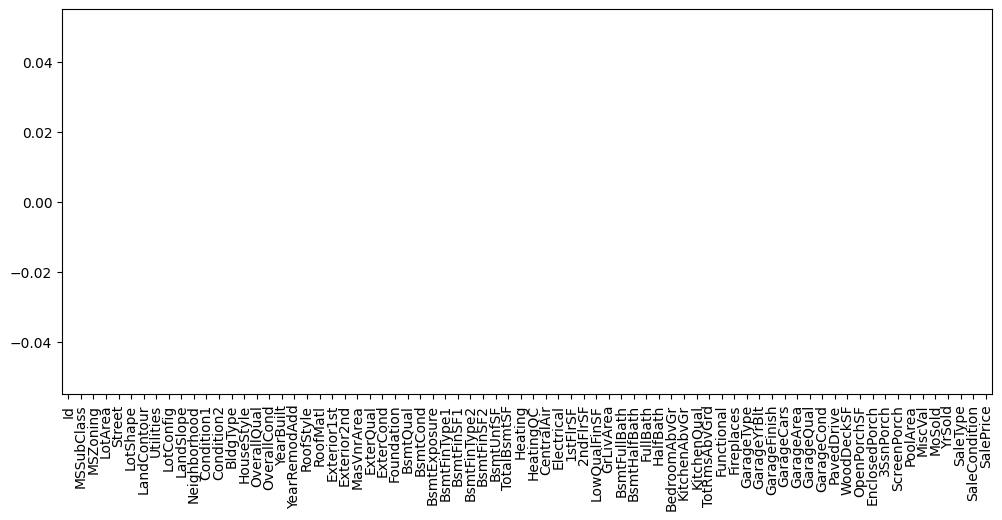

In [9]:
plt.figure(figsize = (12,5))
df.isnull().sum().plot(kind = 'bar');
plt.tight_layout

In [10]:
# Using LabelEncoder in order to convert Categorical column to Numerical Column

le = LabelEncoder()
for i in categorical_col.columns:
  df[i] = le.fit_transform(df[i])

In [11]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# EDA : Univariate Analysis

from collections import OrderedDict

stats = []

for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature' : i,
      'Count':df[i].count(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Standard Deviation':df[i].std(),
      'Skewness' : df[i].skew(),
      'Kurtosis' : df[i].kurt(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75)-df[i].quantile(0.25)
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,Feature,Count,Minimum,Maximum,Mean,Median,Standard Deviation,Skewness,Kurtosis,Q1,Q3,IQR
0,Id,1460,1.0,1460.0,730.500000,730.5,421.610009,0.000000,-1.200000,365.75,1095.25,729.50
1,MSSubClass,1460,20.0,190.0,56.897260,50.0,42.300571,1.407657,1.580188,20.00,70.00,50.00
2,MSZoning,1460,0.0,4.0,3.028767,3.0,0.632017,-1.735395,6.287175,3.00,3.00,0.00
3,LotArea,1460,1300.0,215245.0,10516.828082,9478.5,9981.264932,12.207688,203.243271,7553.50,11601.50,4048.00
4,Street,1460,0.0,1.0,0.995890,1.0,0.063996,-15.518770,239.159822,1.00,1.00,0.00
5,LotShape,1460,0.0,3.0,1.942466,3.0,1.409156,-0.610175,-1.595908,0.00,3.00,3.00
6,LandContour,1460,0.0,3.0,2.777397,3.0,0.707666,-3.162499,8.695631,3.00,3.00,0.00
7,Utilities,1460,0.0,1.0,0.000685,0.0,0.026171,38.209946,1460.000000,0.00,0.00,0.00
8,LotConfig,1460,0.0,4.0,3.019178,4.0,1.622634,-1.135632,-0.579872,2.00,4.00,2.00
9,LandSlope,1460,0.0,2.0,0.062329,0.0,0.276232,4.813682,24.597605,0.00,0.00,0.00


In [12]:
report[report['IQR'] == 0]['Feature'].values

array(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
       'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition'], dtype=object)

In [13]:
# Data Cleaning

df.drop(columns = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope',
       'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
       'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition'], inplace = True)

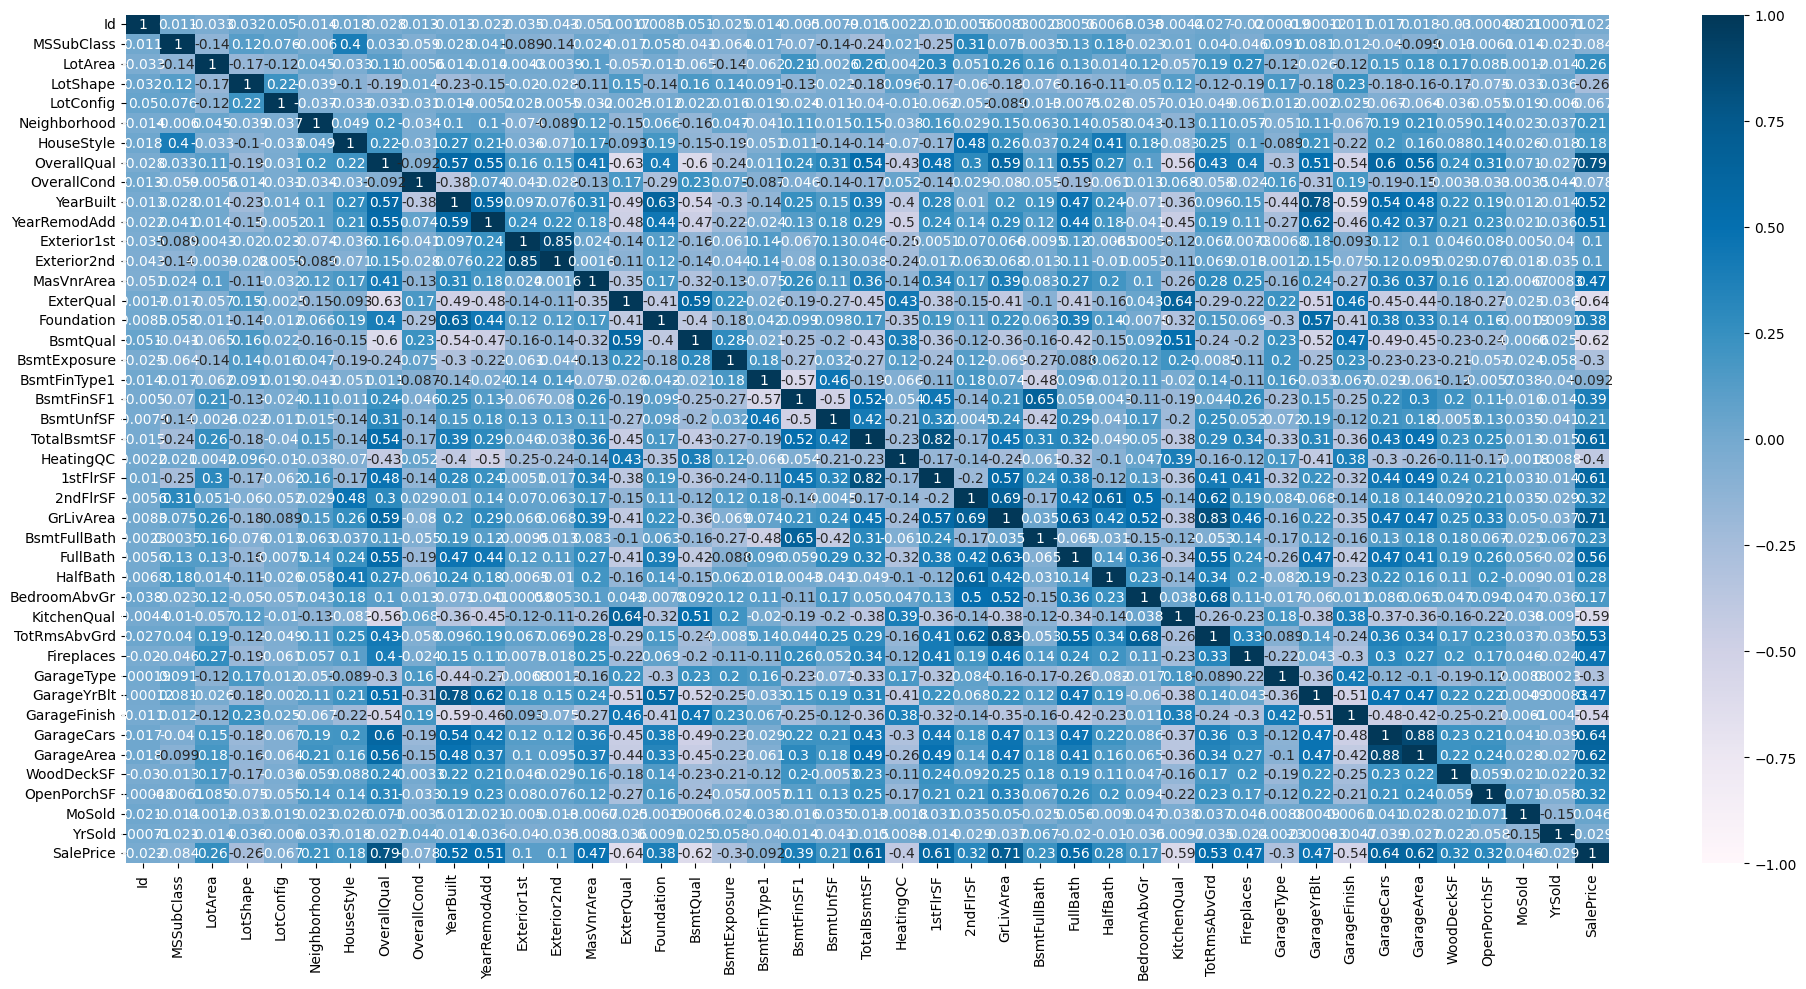

In [14]:
# Heatmap
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(),annot= True,vmin= -1, vmax= 1, center= 0,cmap = 'PuBu')
plt.tight_layout()
plt.show()

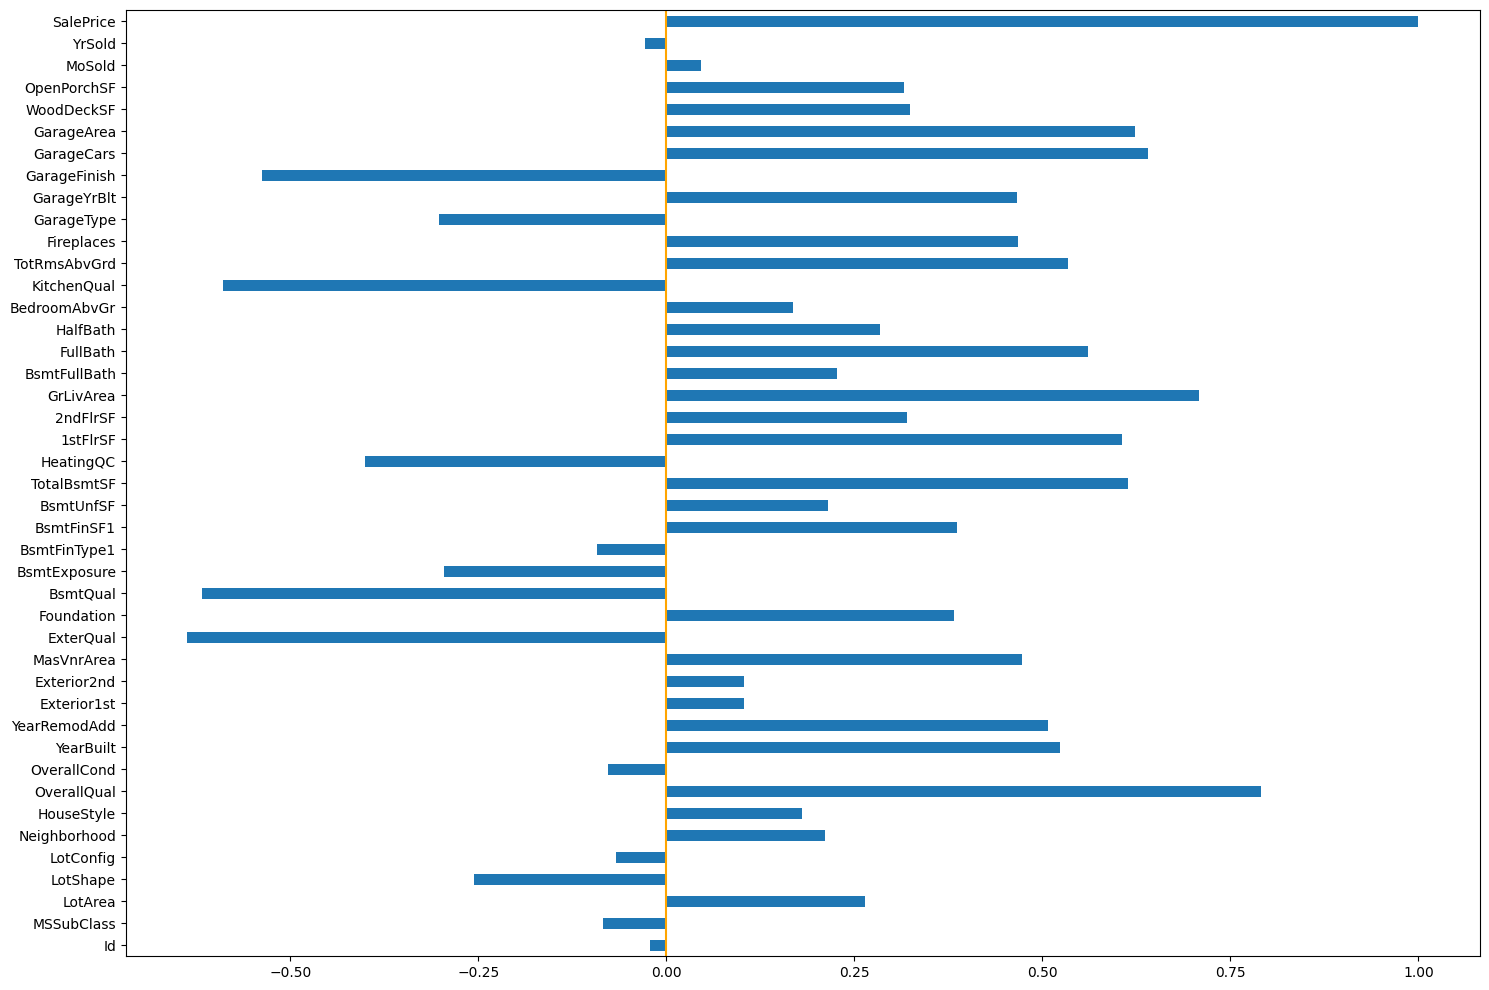

In [15]:
plt.figure(figsize= (15,10))
df.corr()['SalePrice'].plot(kind = 'barh')
plt.axvline(0,color = 'orange')
plt.tight_layout()
plt.show()

In [16]:
X = df.drop(columns = ['Id','SalePrice'], axis = 1)
y = df['SalePrice']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state= 42)

In [18]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
r2_score(y_test,y_pred_rf)

0.9074390780448988

In [20]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
r2_score(y_test,y_pred_xgb)

0.8964300100768124

In [21]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


In [22]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train)
y_pred_cat = cat.predict(X_test)
r2_score(y_test,y_pred_cat)

Learning rate set to 0.041084
0:	learn: 75611.8178551	total: 55.3ms	remaining: 55.3s
1:	learn: 73754.0404658	total: 66ms	remaining: 32.9s
2:	learn: 71862.3353361	total: 75.8ms	remaining: 25.2s
3:	learn: 70099.3678936	total: 85.6ms	remaining: 21.3s
4:	learn: 68342.7455865	total: 92.9ms	remaining: 18.5s
5:	learn: 66729.4637387	total: 103ms	remaining: 17.1s
6:	learn: 65257.1026384	total: 113ms	remaining: 16.1s
7:	learn: 63623.7967364	total: 123ms	remaining: 15.2s
8:	learn: 62146.7165294	total: 131ms	remaining: 14.4s
9:	learn: 60808.4960242	total: 141ms	remaining: 13.9s
10:	learn: 59492.6097615	total: 151ms	remaining: 13.5s
11:	learn: 58113.8646515	total: 161ms	remaining: 13.2s
12:	learn: 56980.7380062	total: 170ms	remaining: 12.9s
13:	learn: 55857.8750328	total: 181ms	remaining: 12.7s
14:	learn: 54700.5416378	total: 190ms	remaining: 12.4s
15:	learn: 53549.8887555	total: 199ms	remaining: 12.2s
16:	learn: 52399.8129041	total: 209ms	remaining: 12.1s
17:	learn: 51446.7604502	total: 219ms	rema

0.9209854220412633

In [24]:
rf.feature_importances_

array([0.00323307, 0.01801003, 0.00235183, 0.00172743, 0.01076872,
       0.00131194, 0.53486641, 0.00460718, 0.01536093, 0.00994617,
       0.00248753, 0.00166592, 0.00501352, 0.00345536, 0.00063749,
       0.01624418, 0.00342781, 0.00153715, 0.02823423, 0.0065613 ,
       0.03228028, 0.00115575, 0.03010334, 0.03310982, 0.13038294,
       0.00137341, 0.00298576, 0.00088436, 0.00140248, 0.00325371,
       0.008217  , 0.00465567, 0.00294612, 0.00623638, 0.01052512,
       0.02013339, 0.01693879, 0.00884814, 0.0064178 , 0.00464774,
       0.00205383])

In [25]:
# y = mx + c

rf.feature_importances_.max()

np.float64(0.5348664074939576)

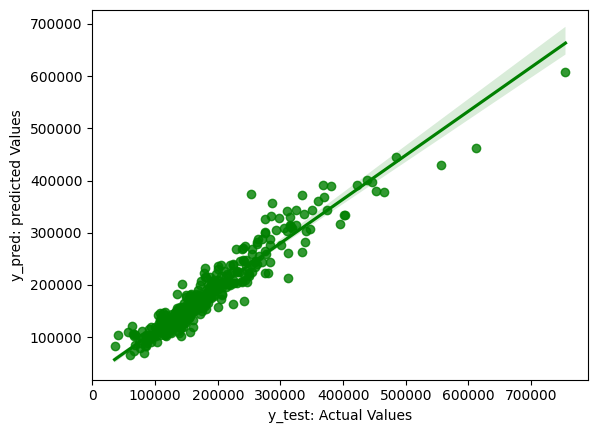

In [28]:
sns.regplot(x = y_test,y=y_pred_rf,color= 'green')
plt.xlabel('y_test: Actual Values')
plt.ylabel('y_pred: predicted Values')
plt.show()

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 41)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor().fit(X_train_pca,y_train)

y_pred_rf = rf.predict(X_test_pca)

r2_score(y_test,y_pred_rf)

0.8170480590999875